<h2>Importing Libraries and Dataset</h2>

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder,FunctionTransformer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [34]:
df = pd.read_csv(
    r"C:\Users\aryan\OneDrive\Documents\Projects\Resume_Classifier\UpdatedResumeDataSet.csv"
)


df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<h2>EDA</h2>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [36]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [37]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [38]:
import nltk

df["word_num"] = df["Resume"].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Category,Resume,word_num
0,Data Science,Skills * Programming Languages: Python (pandas...,806
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,179
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",295
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,1149
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",71


In [39]:
df["char_num"] = df["Resume"].apply(len)
df.head()

,Category,Resume,word_num,char_num
0,Data Science,Skills * Programming Languages: Python (pandas...,806,4786
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,179,1268
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",295,1871
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,1149,6995
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",71,452


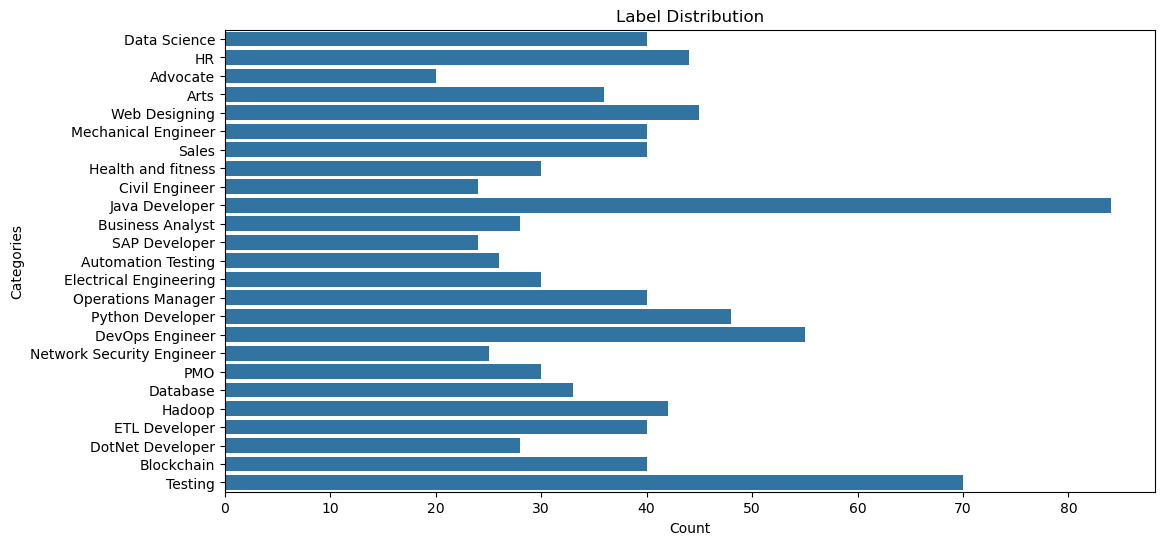

In [40]:
plt.figure(figsize=(12, 6))
plt.title("Label Distribution")
sns.countplot(data=df, y=df["Category"])
plt.ylabel("Categories")
plt.xlabel("Count")
plt.show()

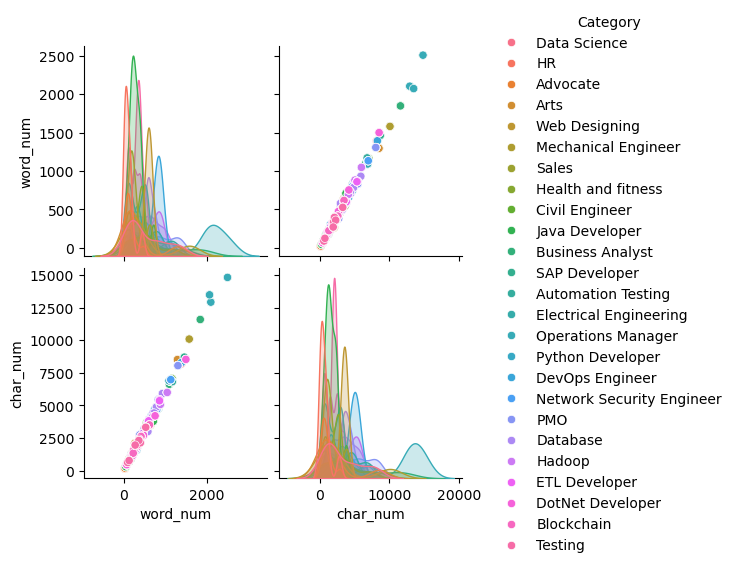

In [41]:
sns.pairplot(df, hue="Category")
plt.show()

In [42]:
le = LabelEncoder()
df["Le_Category"] = le.fit_transform(df["Category"])
df.head()

,Category,Resume,word_num,char_num,Le_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,806,4786,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,179,1268,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",295,1871,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,1149,6995,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",71,452,6


In [43]:
from nltk import PorterStemmer
from nltk.corpus import stopwords
import string

ps = PorterStemmer()


def clean_data(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


clean_data(df["Resume"][3])

'skill r python sap hana tableau sap hana sql sap hana pal ms sql sap lumira c linear program data model advanc analyt scm analyt retail analyt media analyt nlp educ detail januari 2017 januari 2018 pgdm busi analyt great lake institut manag illinoi institut technolog januari 2013 bachelor engin electron commun bengaluru karnataka new horizon colleg engin bangalor visvesvaraya technolog univers data scienc consult consult deloitt usi skill detail linear exprienc 6 month exprienc 6 month retail exprienc 6 month exprienc 6 month exprienc less 1 year month deep exprienc less 1 year month machin exprienc less 1 year month exprienc less 1 year month exprienc less 1 year monthscompani detail compani deloitt usi descript project involv analys histor deal come insight optim futur deal role given raw data carri end end analysi present insight client key respons extract data client system across geographi understand build report tableau infer meaning insight optim price find process blockad tech

In [44]:
df["transformed_data"] = df["Resume"].apply(clean_data)
df.head()

,Category,Resume,word_num,char_num,Le_Category,transformed_data
0,Data Science,Skills * Programming Languages: Python (pandas...,806,4786,6,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,179,1268,6,educ detail may 2013 may 2017 data scientist d...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",295,1871,6,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,1149,6995,6,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",71,452,6,educ detail mca ymcaust faridabad haryana data...


In [45]:
X = df.transformed_data
Y = df.Le_Category
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)

In [46]:
from text_utils import text_cleaner_func


def apply_text_cleaner(x):
    return x.apply(text_cleaner_func)


text_cleaner_transformer = FunctionTransformer(func=apply_text_cleaner, validate=False)

In [47]:
models = {
    "LR": LogisticRegression(),
    "SVC": SVC(),
    "DTC": DecisionTreeClassifier(),
    "GNB": GaussianNB(),
    "MNB": MultinomialNB(),
    "KNC": KNeighborsClassifier(),
    "RFC": RandomForestClassifier(),
    "GBC": GradientBoostingClassifier(),
}


for name, model in models.items():
    print(name)

    steps = [
        ("cleaner", text_cleaner_transformer),
        ("vec", CountVectorizer(stop_words="english", ngram_range=(1, 2))),
    ]

    if name in ["MNB", "GNB", "KNC"]:

        steps.append(
            ("to_dense", FunctionTransformer(lambda x: x.toarray(), accept_sparse=True))
        )

    steps.append(("smote", SMOTE(random_state=42)))

    steps.append(("model", model))

    pipeline = Pipeline(steps)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100

    train_score = pipeline.score(X_train, y_train) * 100

    test_score = pipeline.score(X_test, y_test) * 100

    print(f"Train Accuracy: {train_score}")

    print(f"Test Accuracy: {test_score}")

    print(f"Model Accuracy: {acc}")

    print(classification_report(y_test, y_pred))

    print("---" * 20)

LR
Train Accuracy: 100.0
Test Accuracy: 99.48186528497409
Model Accuracy: 99.48186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00

In [48]:
steps = [
    ("cleaner", text_cleaner_transformer),
    ("vec", CountVectorizer(stop_words="english", ngram_range=(1, 2))),
]
steps.append(("smote", SMOTE(random_state=42)))

steps.append(("model", DecisionTreeClassifier()))
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('cleaner',
                 FunctionTransformer(func=<function apply_text_cleaner at 0x00000232092B6480>)),
                ('vec',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('model', DecisionTreeClassifier())])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)
X_train = pipeline.named_steps["cleaner"].fit_transform(X_train)

In [50]:
X_train = pipeline.named_steps["vec"].fit_transform(X_train)

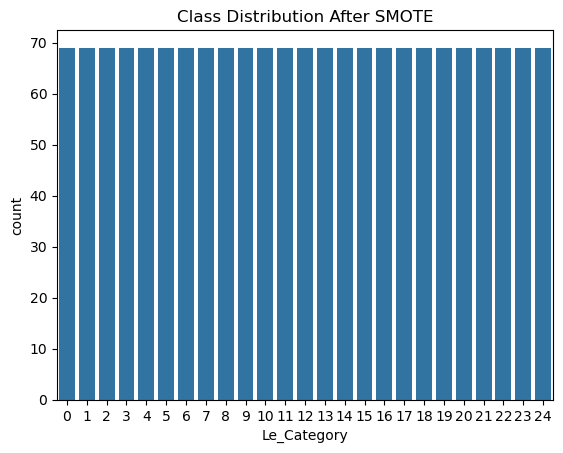

In [51]:
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train, y_train)
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [54]:
cv = cross_val_score(pipeline, X_train, y_train)
print("CV:", cv * 100)
print("Avg:", cv.mean() * 100)

CV: [100.         98.7012987 100.         98.7012987 100.       ]
Avg: 99.48051948051948


In [55]:
param = {
    "model__criterion": ["gini", "entropy", "log_loss"],
    "model__max_depth": [None, 5, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": [None, "sqrt", "log2"],
    "model__splitter": ["best", "random"],
}

randcv = RandomizedSearchCV(pipeline, param, cv=5, n_jobs=-1)
randcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cleaner',
                                              FunctionTransformer(func=<function apply_text_cleaner at 0x00000232092B6480>)),
                                             ('vec',
                                              CountVectorizer(ngram_range=(1,
                                                                           2),
                                                              stop_words='english')),
                                             ('smote', SMOTE(random_state=42)),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'model__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                                        'model__max_depth': [None, 5, 10, 20,
                                                             30],
                                        'model__max_features': [None, 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__splitter': ['best', 'random']})

In [56]:
randcv.best_score_

0.8842543077837195

In [57]:
randcv.best_estimator_

Pipeline(steps=[('cleaner',
                 FunctionTransformer(func=<function apply_text_cleaner at 0x00000232092B6480>)),
                ('vec',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=20,
                                        max_features='sqrt',
                                        min_samples_split=10))])

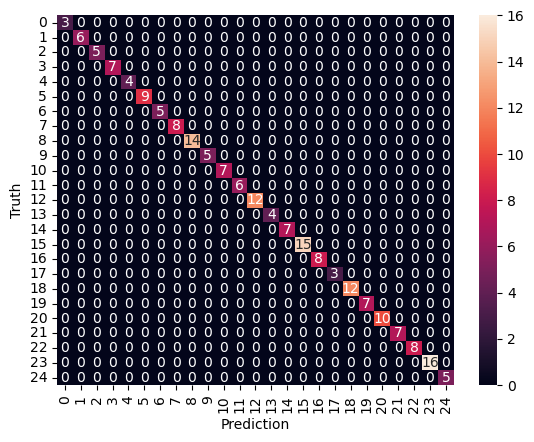

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [60]:
df[["Category", "Le_Category"]].drop_duplicates().reset_index(drop=True)

,Category,Le_Category
0,Data Science,6
1,HR,12
2,Advocate,0
3,Arts,1
4,Web Designing,24
5,Mechanical Engineer,16
6,Sales,22
7,Health and fitness,14
8,Civil Engineer,5
9,Java Developer,15


In [61]:
import pickle

model_name = "DTCModel.pkl"
with open(model_name, "wb") as f:
    pickle.dump(pipeline, f)

In [62]:
def text_cleaner(x):
    return x.apply(text_cleaner_func)